# <center>Incremental Clustering: Intrusion Detection on Visual Surveillance <center>

Detection of abnormalities in live videos requires optimized scene representation which involves 
real-time detection of objects while efficiently representing the state of objects temporally across 
frames. For such purposes, Incremental Clustering can be used. Incremental clustering
allows clustering of pixels with motion which is further used for mapping the trajectories in 
subsequent frames and can be used for Surveillance and for real-time traffic analysis.


### Question:
In today's world, the data is dynamic and hence, it is not always feasible to use Non -incremental
clustering techniques which rely on the complete dataset for forming the clusters. Thus, we need an 
incremental clustering algorithm that automatically adapts to itself as the data points increase. 
Implement a basic incremental K Means algorithm using the iris dataset (available in scikitlearn module or can download the csv file). Once done, try using the same algorithm for intrusion 
detection using any video of your choice (Only one such video is required as our algorithm will 
learn as the new frames are introduced automatically)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import cv2

In [5]:
class IncrementalKMeans:
    def __init__(self, n_clusters, max_iterations=10):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.kmeans = KMeans(n_clusters=n_clusters)

    def fit(self, data):
        all_centroids = []
        all_labels = []
        for iteration in range(self.max_iterations):
            self.kmeans.fit(data)
            all_centroids.append(self.kmeans.cluster_centers_)
            all_labels.append(self.kmeans.labels_)

        print(f"Iteration {iteration + 1}, Centroids: {all_centroids}, Labels:{all_labels}")
        return all_centroids, all_labels
# Visualize clusters and centroids across iterations
def visualize_clusters_with_centroids(data, centroids_per_iteration, labels_per_iteration, n_clusters):
    plt.figure(figsize=(12, 8))
    for iteration, centroids in enumerate(centroids_per_iteration):
        plt.subplot(2, 3, iteration + 1)
        plt.scatter(data[:, 0], data[:, 1], c=labels_per_iteration[iteration], cmap='viridis', label='Data Points')
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red', label='Centroids')
        plt.title(f'Iteration {iteration + 1}')
    plt.tight_layout()
    plt.show()

In [6]:
# Example usage for clustering the Iris dataset with centroids and labels across iterations
if __name__ == "__main__":
    iris = load_iris()
    data = iris.data[:, :2]  # Using only the first two features for visualization
    n_clusters = 3
    max_iterations = 3

C:\__pycache__\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\__pycache__\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\__pycache__\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\__pycache__\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Iteration 3, Centroids: [array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]]), array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]]), array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])], Labels:[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 

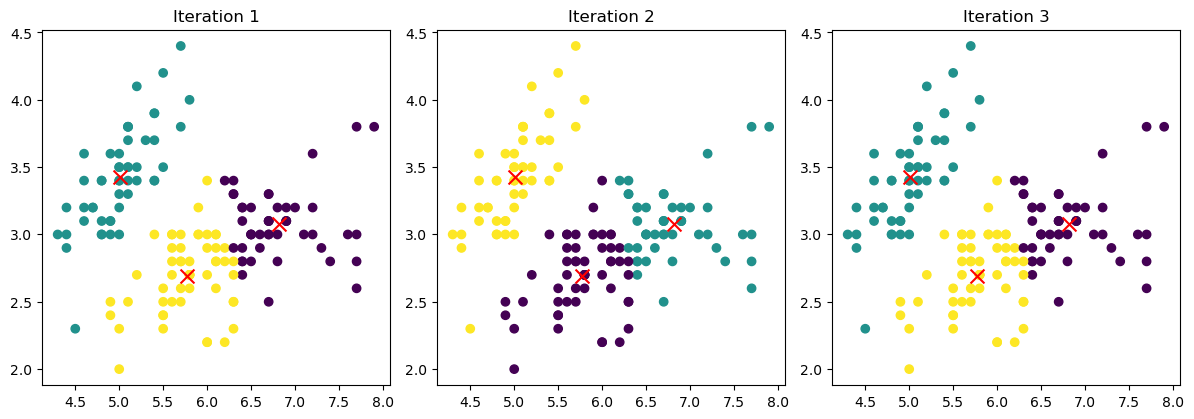

In [7]:
incremental_kmeans = IncrementalKMeans(n_clusters=n_clusters, max_iterations=max_iterations)
centroids_per_iteration, labels_per_iteration = incremental_kmeans.fit(data)

visualize_clusters_with_centroids(data, centroids_per_iteration, labels_per_iteration, n_clusters)

In [10]:
class IncrementalKMeans:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iterations)

    def fit(self, data):
        self.kmeans.fit(data)

    def predict(self, data):
        return self.kmeans.predict(data)

class BackgroundModel:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.background = None

    def update(self, frame):
        if self.background is None:
            self.background = frame.copy().astype('float')
            return

        cv2.accumulateWeighted(frame, self.background, self.alpha)

    def get_background(self):
        return self.background.astype('uint8') if self.background is not None else None

# Create a VideoCapture object
cap = cv2.VideoCapture(r"C:\Ball_Dataset")

background_model = BackgroundModel()
n_clusters = 3
max_frames_for_clustering = 50  # Adjust this value based on your needs
frames_for_clustering = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    background_model.update(gray_frame)
    background = background_model.get_background()

    frames_for_clustering.append(background)  # Use background image for clustering

    if len(frames_for_clustering) >= max_frames_for_clustering:
    # Apply clustering to the accumulated frames
        data_for_clustering = np.array(frames_for_clustering)
        flattened_data = data_for_clustering.reshape(data_for_clustering.shape[0], -1)  # Flatten each frame
    
    # Adjust the number of clusters based on the number of frames
        n_clusters = min(len(frames_for_clustering), n_clusters)
    
        incremental_kmeans = IncrementalKMeans(n_clusters=n_clusters, max_iterations=max_iterations)
        incremental_kmeans.fit(flattened_data)

        frames_for_clustering = []  # Clear accumulated frames


   # Calculate absolute difference between frame and background
    diff = cv2.absdiff(background, gray_frame)
    _, thresholded_diff = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    data_for_clustering = []

    for contour in contours:
        if cv2.contourArea(contour) > 1000:
            x, y, w, h = cv2.boundingRect(contour)
            cropped_frame = gray_frame[y:y+h, x:x+w]
            resized_frame = cv2.resize(cropped_frame, (100, 100))
            flattened_frame = resized_frame.flatten()
            data_for_clustering.append(flattened_frame)

    if data_for_clustering:
        
        data_for_clustering = np.array(data_for_clustering)
        incremental_kmeans.fit(data_for_clustering)
        frame_labels = incremental_kmeans.predict(data_for_clustering)

        for label, contour in zip(frame_labels, contours):
            if cv2.contourArea(contour) > 1000:
                x, y, w, h = cv2.boundingRect(contour)
                color = (0, 255, 0) if label == 0 else (0, 0, 255)
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    cv2.imshow("Intrusion Detection", frame)

    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()
